In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from  bnse import *
import statsmodels.api as sm

In [19]:
example = 'hr1'

if example=='hr1':
    signal = np.loadtxt('data/hr2.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'hr2':
    signal = np.loadtxt('data/hr1.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'sunspots':
    dta = sm.datasets.sunspots.load_pandas().data
    signal = np.array(dta.SUNACTIVITY)
    time = np.array(dta.YEAR)
    time_label = 'time'
    signal_label = 'sunspot data'
        
signal = signal - np.mean(signal)
#can change the number of observations here
#indices = np.random.randint(0, len(time), size=int(len(time))) 
indices = np.random.randint(0, len(time), size=450) 
indices =np.sort(indices)
signal = signal[indices]
time = time[indices]
my_bse = bse(time, signal)
my_bse.set_labels(time_label, signal_label)

if example=='hr1':
    my_bse.set_freqspace(0.03)
elif example == 'hr2':
    my_bse.set_freqspace(0.03)
elif example == 'sunspots':
    my_bse.set_freqspace(0.2)

Negative log likelihood (before training): 979.8645526674757


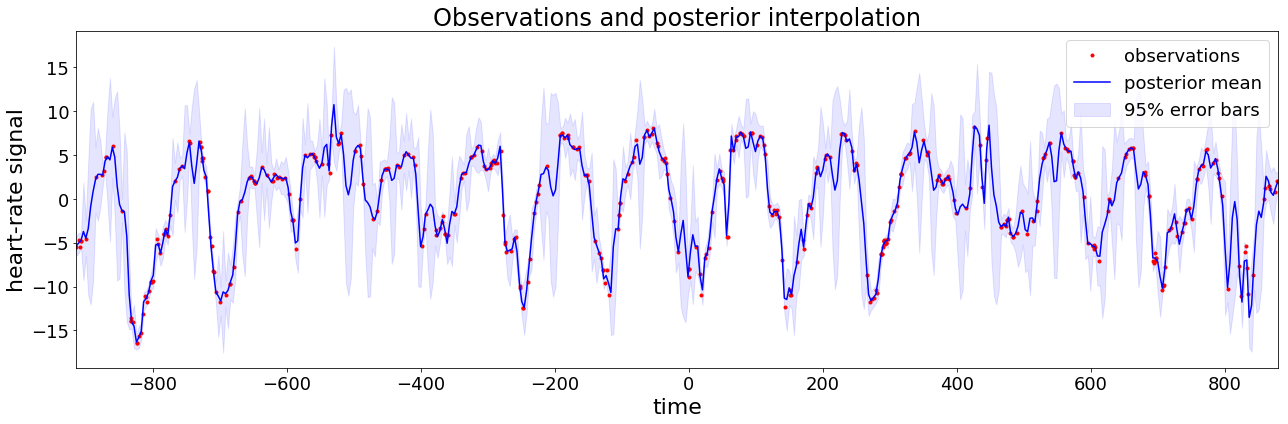

In [20]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()


In [21]:
my_bse.train()


Hyperparameters are:
sigma =4.896562806304396
gamma =0.010471862713808608
theta =0.0003383296336279309
sigma_n =0.5757241839527004


Negative log likelihood (before training): 882.9696292313611


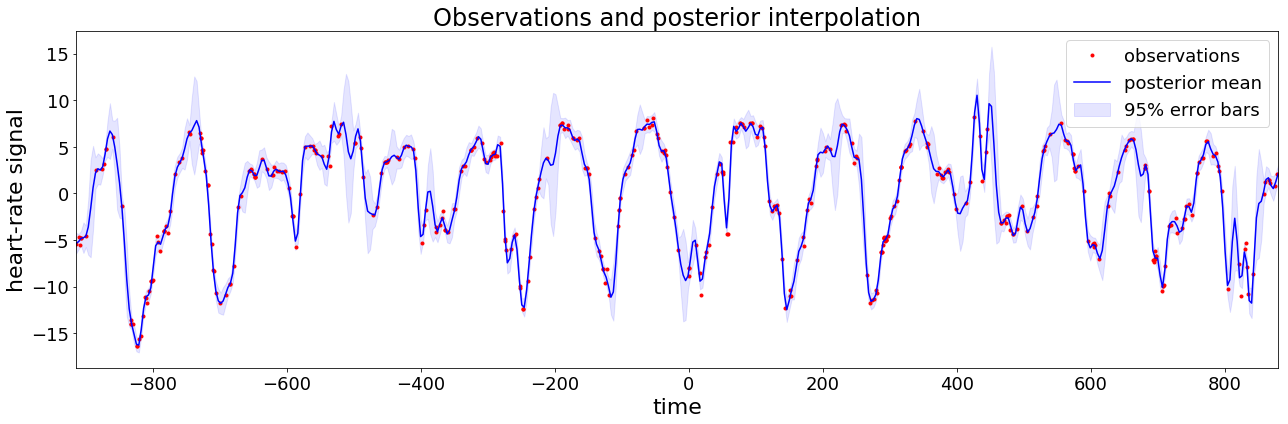

In [22]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()

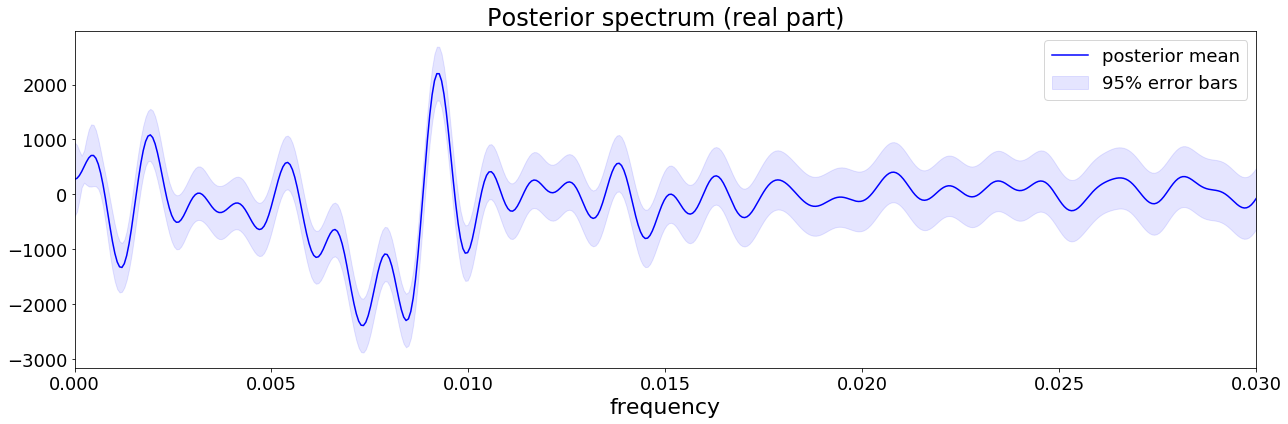

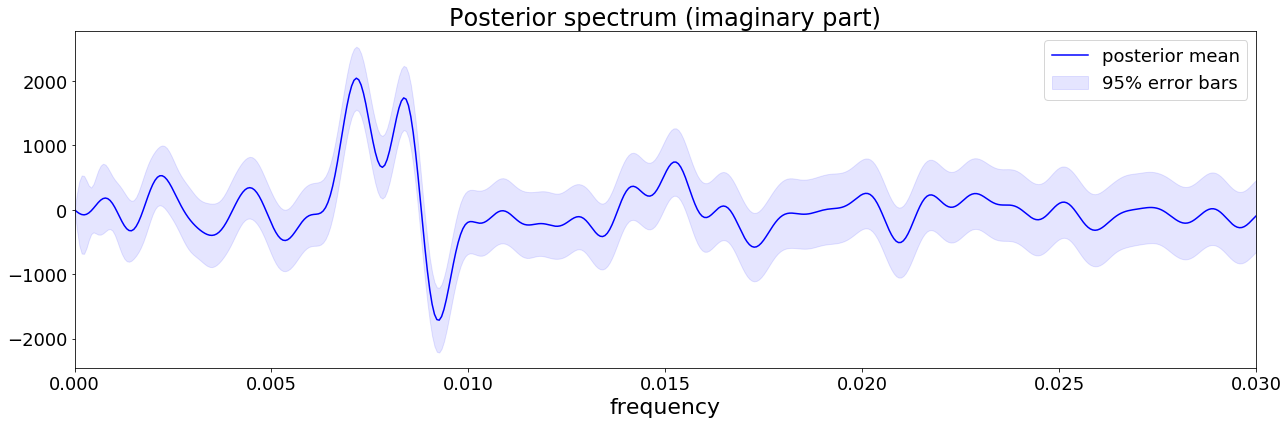

In [23]:
my_bse.plot_freq_posterior()


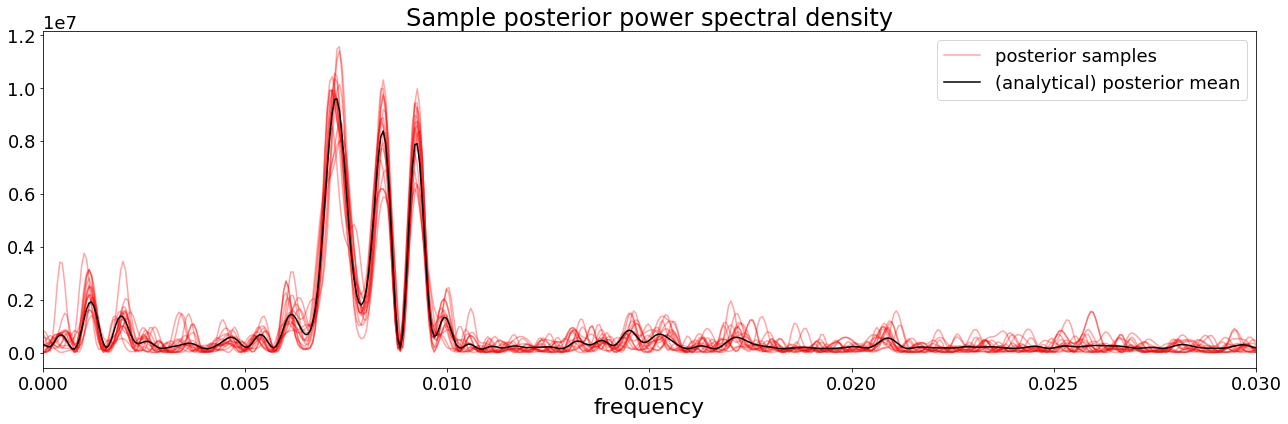

In [24]:
my_bse.plot_power_spectral_density(15)

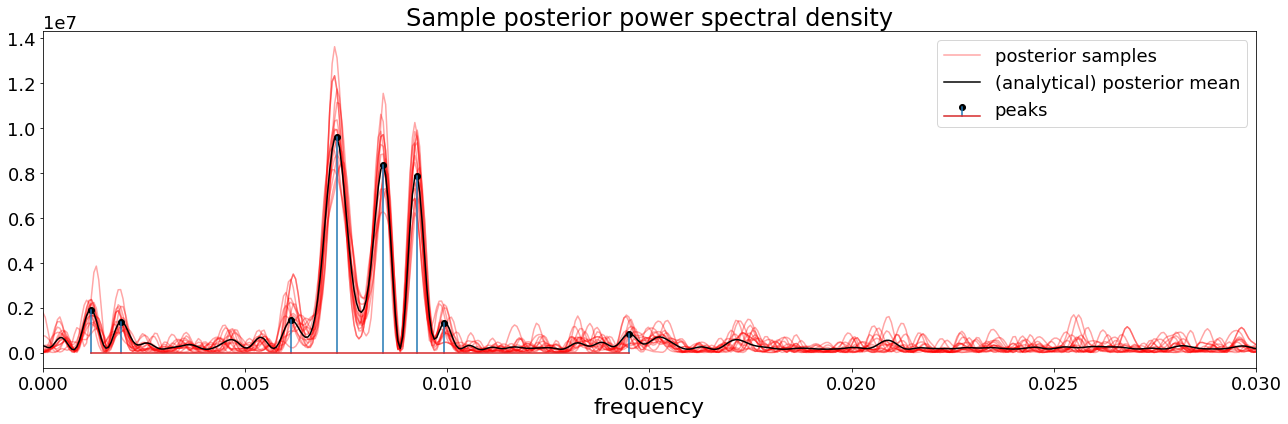

In [25]:
my_bse.plot_power_spectral_density(15, 'show peaks')
